In [1]:
%run PreProcessing.ipynb

Current Progress: 100.0 %


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
field_data = zone_data.copy()

In [4]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,stripped_diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,harvest_date,fieldvariety,fieldvarietydate,heat_units,solar_radiation
0,Allans 06 - 1,2021-07-29,Allans 06,1,13.0,11.96,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270,40,41,19,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
1,Allans 06 - 1,2021-07-29,Allans 06,1,14.0,12.88,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270,40,41,19,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
2,Allans 06 - 1,2021-07-29,Allans 06,1,8.0,7.36,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270,40,41,19,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
3,Allans 06 - 1,2021-07-29,Allans 06,1,10.0,9.20,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270,40,41,19,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0
4,Allans 06 - 1,2021-07-29,Allans 06,1,7.0,6.44,Allans 06 - 1 - 2021-07-29,2021-04-10,Krypton,Drilled,Conventional,Barley,262270,40,41,19,24.6,NaT,Allans 06 - Krypton,Allans 06 - Krypton - 2021-07-29,0,0


In [5]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133290 entries, 0 to 133289
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fieldzone          133290 non-null  object        
 1   sample_date        133290 non-null  datetime64[ns]
 2   field              133290 non-null  object        
 3   zone               133290 non-null  object        
 4   diameter           133290 non-null  float64       
 5   stripped_diameter  133290 non-null  float64       
 6   fieldzonedate      133290 non-null  object        
 7   planting_date      133290 non-null  datetime64[ns]
 8   variety            133290 non-null  object        
 9   method             133290 non-null  object        
 10  inputs             133290 non-null  object        
 11  protection         133290 non-null  object        
 12  planting_rate      133290 non-null  int64         
 13  sand               133290 non-null  int64   

In [6]:
field_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,harvest_date,fieldzone,fieldvariety,mean_pp2m2,max_sample_date,max_mean_diameter_lin,max_std_dev_diameter_lin,max_heat,max_solar,remaining_heat,remaining_solar,rain_after_planting,establishment,est_mean_diameter_gain,est_std_dev_diameter_gain,est_mean_diameter,est_std_dev_diameter
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 07 - 1,Allans 07 - Krypton,43.750000,2020-01-13 00:00:00,9.262932,4.348295,4075.0,1761914.0,8740.479464,4.139903e+06,13.942857,0.875630,0.0,0.0,0.0,0.0
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 07 - 2,Allans 07 - Krypton,42.750000,2020-01-13 00:00:00,9.434036,4.100674,4075.0,1761914.0,8740.479464,4.139903e+06,13.942857,0.855616,0.0,0.0,0.0,0.0
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 07 - 3,Allans 07 - Longton,44.500000,2020-01-13 00:00:00,8.156374,2.884318,4075.0,1761914.0,8740.479464,4.139903e+06,13.942857,0.867365,0.0,0.0,0.0,0.0
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 07 - 4,Allans 07 - Longton,45.750000,2020-01-13 00:00:00,8.513126,3.367604,4075.0,1761914.0,8740.479464,4.139903e+06,13.942857,0.891729,0.0,0.0,0.0,0.0
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,2019-12-15,Allans 07 - 5,Allans 07 - Batter,44.333333,2020-01-20 00:00:00,8.227045,3.338805,4086.0,1771427.0,8730.649107,4.129997e+06,13.942857,0.897262,0.0,0.0,0.0,0.0


In [7]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      755 non-null    object        
 1   zone                       755 non-null    int32         
 2   planting_date              755 non-null    datetime64[ns]
 3   variety                    755 non-null    object        
 4   method                     755 non-null    object        
 5   inputs                     755 non-null    object        
 6   protection                 755 non-null    object        
 7   planting_rate              755 non-null    int64         
 8   sand                       755 non-null    int64         
 9   silt                       755 non-null    int64         
 10  clay                       755 non-null    int64         
 11  organic_matter             755 non-null    float64       
 12  harvest_

In [8]:
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.jpeg_quality"] = 75
plt.rcParams["savefig.format"] = 'jpeg'

<ipython-input-8-bfc092efb67f>:2: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  plt.rcParams["savefig.jpeg_quality"] = 75


In [9]:
def conventional_comparison(field_list, date_list, variety_list):
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]
    if date_list:
        df = df[df['sample_date'].isin(date_list)]
    if variety_list:
        df = df[df['variety'].isin(variety_list)]
    
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = False)
    
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    plt.xlim(0, 70)
    
    name = 'Conventional Comparison'
    plt.ylabel('Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def conventional_comparison_cumulative(field_list, date_list, variety_list, upper, lower):
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]
    if date_list:
        df = df[df['sample_date'].isin(date_list)]
    if variety_list:
        df = df[df['variety'].isin(variety_list)]
        
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = True)
    
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    plt.axhline(y = upper, color = 'red')
    plt.axhline(y = lower, color = 'red')
    plt.xlim(0, 70)
    
    name = 'Conventional Cumulative Comparison'
    plt.ylabel('Cumulative Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def baby_comparison(field_list, date_list, variety_list):
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]
    if date_list:
        df = df[df['sample_date'].isin(date_list)]
    if variety_list:
        df = df[df['variety'].isin(variety_list)]
    
    ax = sns.displot(df,
                     x="stripped_diameter",
                     hue="fieldvarietydate",
                     kind="kde",
                     fill=True,
                     bw_adjust=1.5,
                     common_norm=True)
    
    plt.axvline(x=12, color='grey')
    plt.axvline(x=20, color='grey')
    plt.ylabel('Proportion of Population')
    plt.xlim(0, 40)
    
    name = 'Baby Comparison'
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def baby_comparison_cumulative(field_list, date_list, variety_list, upper, lower):
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]
    if date_list:
        df = df[df['sample_date'].isin(date_list)]
    if variety_list:
        df = df[df['variety'].isin(variety_list)]
        
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = True)
    
    plt.axvline(x=12, color='grey')
    plt.axvline(x=20, color='grey')
    plt.axhline(y = upper, color = 'red')
    plt.axhline(y = lower, color = 'red')
    plt.xlim(0, 40)
    
    name = 'Baby Cumulative Comparison'
    plt.ylabel('Cumulative Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
    
def organic_comparison(field_list, date_list, variety_list):
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]
    if date_list:
        df = df[df['sample_date'].isin(date_list)]
    if variety_list:
        df = df[df['variety'].isin(variety_list)]
    
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=2,
                common_norm=True)
    
    plt.axvline(x=18, color='grey')
    plt.axvline(x=42, color='grey')
    plt.ylabel('Proportion of Population')
    plt.xlim(0, 60)
    
    name = 'Organic Comparison'
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def field_growth(field_list):
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]

    
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = False)
    
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    plt.xlim(0, 70)
    
    name = 'Plant Growth'
    plt.ylabel('Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
    

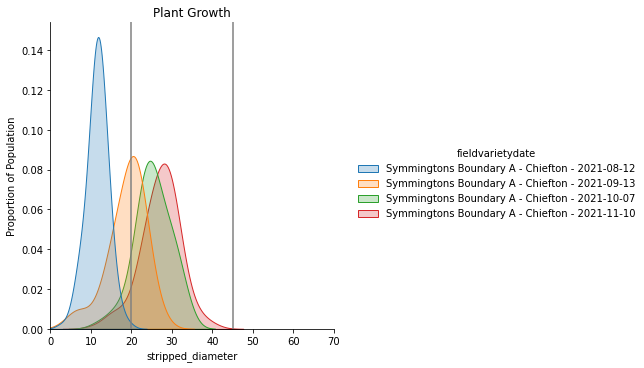

In [10]:
field_growth(['Symmingtons Boundary A'])

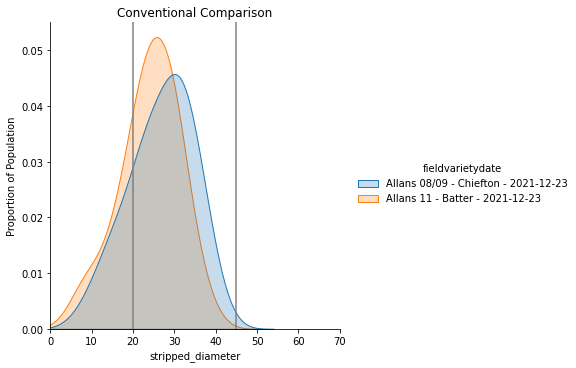

In [11]:
conv_field_list = ['Allans 08/09', 'Allans 11']
conv_date_list = ['2021-12-23']
conv_variety_list = ['Batter', 'Chiefton']

conventional_comparison(conv_field_list, conv_date_list, conv_variety_list)

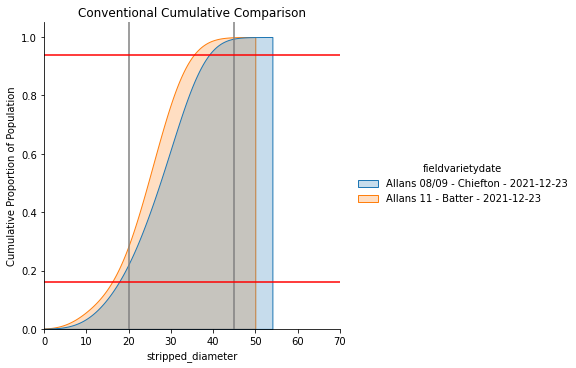

In [12]:
conventional_comparison_cumulative(conv_field_list, conv_date_list, conv_variety_list, 0.94, 0.16)

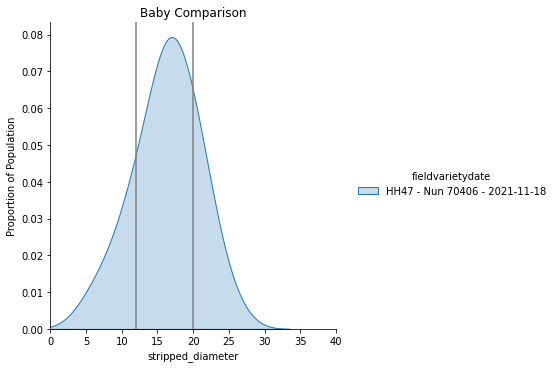

In [13]:
baby_field_list = ['HH47']
baby_date_list = ['2021-11-18']
baby_variety_list = ['Nun 70406']

baby_comparison(baby_field_list, baby_date_list, baby_variety_list)

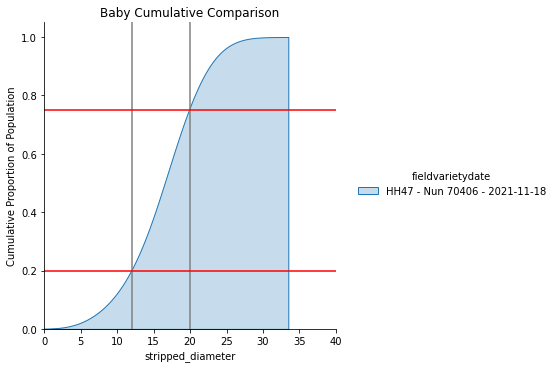

In [14]:
baby_comparison_cumulative(baby_field_list, baby_date_list, baby_variety_list, 0.75, 0.2)

<AxesSubplot:xlabel='solar_radiation', ylabel='mean_diameter'>

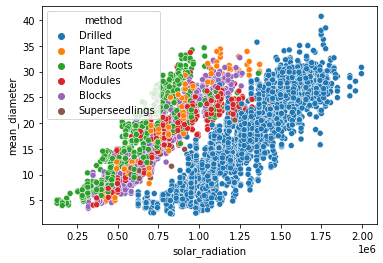

In [15]:
sns.scatterplot(data = summary_data_avg, x = 'solar_radiation', y = 'mean_diameter', hue = 'method')

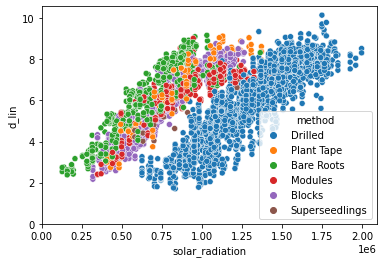

In [16]:
sns.scatterplot(data = summary_data_avg, x = 'solar_radiation', y = 'd_lin', hue = 'method')
plt.xlim(0)
plt.ylim(0)
plt.show()

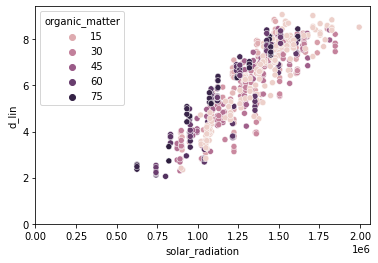

In [17]:
sns.scatterplot(data = summary_data_avg[(summary_data_avg.method == 'Drilled') & (summary_data_avg.variety.isin(['Chiefton']))], x = 'solar_radiation', y = 'd_lin', hue = 'organic_matter')
plt.xlim(0)
plt.ylim(0)
plt.show()

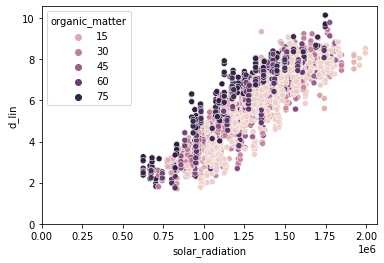

In [18]:
sns.scatterplot(data = summary_data_avg[(summary_data_avg.method == 'Drilled')], x = 'solar_radiation', y = 'd_lin', hue = 'organic_matter')
plt.xlim(0)
plt.ylim(0)
plt.show()

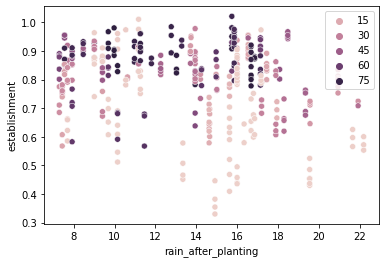

In [19]:
sns.scatterplot(x = 'rain_after_planting', y = 'establishment', hue='organic_matter', data = zone_data[(zone_data.method == 'Drilled') & (zone_data.inputs == 'Conventional')])
plt.legend(loc = 'upper right')
plt.show()

6    765
4    675
Name: row_config, dtype: int64
2021-09-07    253
2021-07-29    244
2021-08-18    240
2021-11-12    235
2021-10-05    235
2021-12-15    233
Name: sample_date, dtype: int64


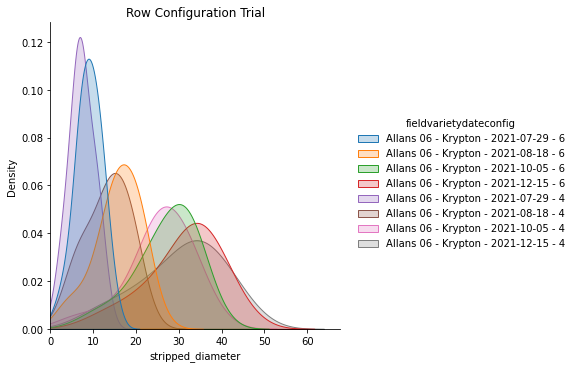

In [20]:
allans06_df = summary_data[(summary_data.field == 'Allans 06')].copy()
allans06_df['row_config'] = 4
allans06_df.loc[allans06_df['zone'].astype(int) < 4, 'row_config'] = 6
allans06_df['fieldvarietydateconfig'] = allans06_df['fieldvarietydate'] + ' - ' + allans06_df['row_config'].astype(str)

print(allans06_df['row_config'].value_counts())
print(allans06_df['sample_date'].value_counts())


allans06_df = allans06_df[allans06_df['sample_date'].isin(['2021-07-29', '2021-08-18', '2021-10-05', '2021-12-15'])]

allans06_df.head()

sns.displot(allans06_df,
            x="stripped_diameter",
            hue="fieldvarietydateconfig",
            kind="kde",
            fill=True,
            bw_adjust=1.5,
            common_norm = False,
            cumulative = False)

plt.xlim(0)
plt.ylim(0)
name = 'Row Configuration Trial'
plt.title(name)
plt.savefig(name, dpi=200)
plt.show()
